### House Price Prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


No Null Values

In [5]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [7]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [9]:
df['mainroad'].unique()

array(['yes', 'no'], dtype=object)

In [ ]:
df = pd.get_dummies(data = df,columns=['guestroom','basement','hotwaterheating','airconditioning','prefarea'],drop_first=True)

In [21]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking',
       'furnishingstatus', 'mainroad_yes', 'guestroom_yes', 'basement_yes',
       'hotwaterheating_yes', 'airconditioning_yes', 'prefarea_yes'],
      dtype='object')

In [29]:
df.head()

,price,area,bedrooms,bathrooms,stories,parking,furnishingstatus,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes
0,13300000,7420,4,2,3,2,furnished,1,False,False,False,True,True
1,12250000,8960,4,4,4,3,furnished,1,False,False,False,True,False
2,12250000,9960,3,2,2,2,semi-furnished,1,False,True,False,False,True
3,12215000,7500,4,2,2,3,furnished,1,False,True,False,True,True
4,11410000,7420,4,1,2,2,furnished,1,True,True,False,True,False


In [32]:
df = df.replace({True:1,False:0})

C:\Users\MadhuLatha\AppData\Local\Temp\ipykernel_12876\191794746.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({True:1,False:0})


In [33]:
df.head(2)

,price,area,bedrooms,bathrooms,stories,parking,furnishingstatus,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes
0,13300000,7420,4,2,3,2,furnished,1,0,0,0,1,1
1,12250000,8960,4,4,4,3,furnished,1,0,0,0,1,0


In [34]:
df['furnishingstatus'].unique()

array(['furnished', 'semi-furnished', 'unfurnished'], dtype=object)

In [38]:
df['furnishingstatus'] = df['furnishingstatus'].map({'unfurnished':1,'semi-furnished':2,'furnished':3})

In [39]:
df.head()

,price,area,bedrooms,bathrooms,stories,parking,furnishingstatus,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_priority
0,13300000,7420,4,2,3,2,3,1,0,0,0,1,1,3
1,12250000,8960,4,4,4,3,3,1,0,0,0,1,0,3
2,12250000,9960,3,2,2,2,2,1,0,1,0,0,1,2
3,12215000,7500,4,2,2,3,3,1,0,1,0,1,1,3
4,11410000,7420,4,1,2,2,3,1,1,1,0,1,0,3


### EDA

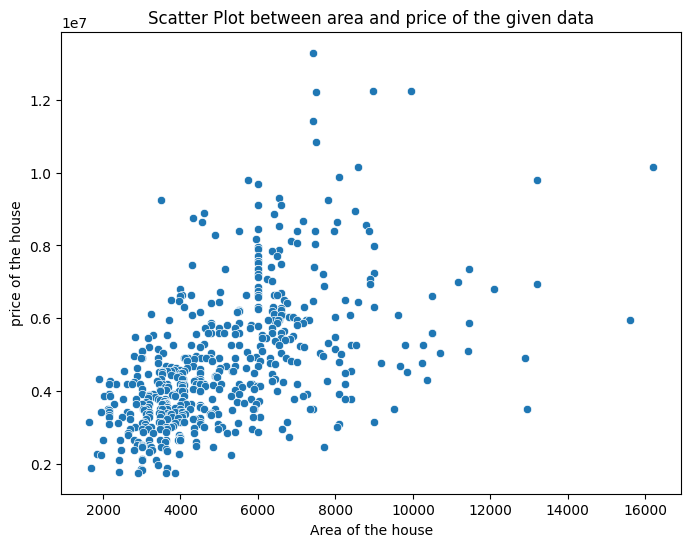

In [43]:
## Relation between area and price

plt.figure(figsize=(8,6))
sns.scatterplot(data = df,x='area',y='price')
plt.title('Scatter Plot between area and price of the given data')
plt.xlabel('Area of the house')
plt.ylabel('price of the house')
plt.show()


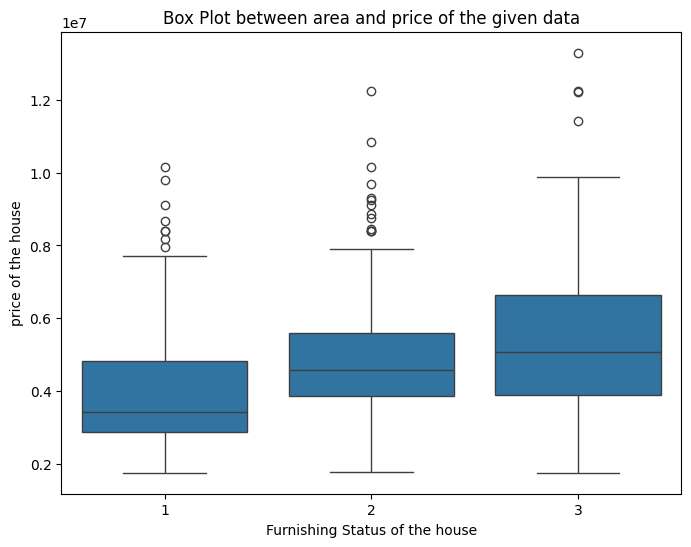

In [44]:
## Relation between furnishingstatus and price

plt.figure(figsize=(8,6))
sns.boxplot(data = df,x='furnishingstatus',y='price')
plt.title('Box Plot between area and price of the given data')
plt.xlabel('Furnishing Status of the house')
plt.ylabel('price of the house')
plt.show()


In [45]:
df.head(2)

,price,area,bedrooms,bathrooms,stories,parking,furnishingstatus,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_priority
0,13300000,7420,4,2,3,2,3,1,0,0,0,1,1,3
1,12250000,8960,4,4,4,3,3,1,0,0,0,1,0,3


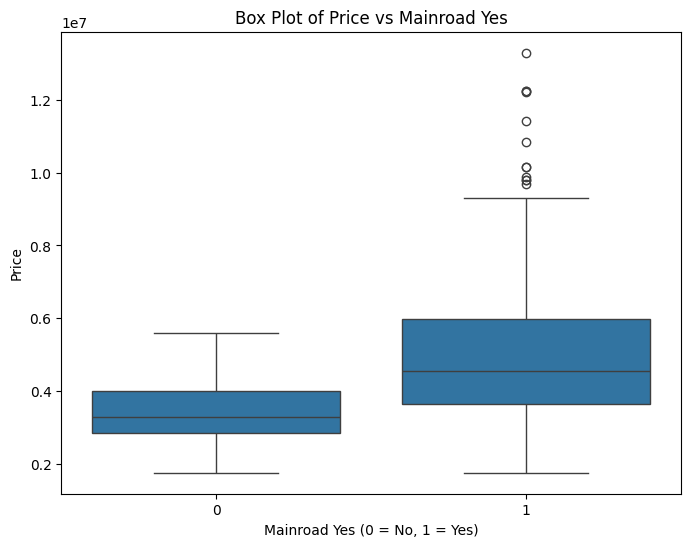

In [46]:
## relation between mainroad_yes and price

plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='mainroad_yes', y='price')
plt.title('Box Plot of Price vs Mainroad Yes')
plt.xlabel('Mainroad Yes (0 = No, 1 = Yes)')
plt.ylabel('Price')
plt.show()


<Axes: >

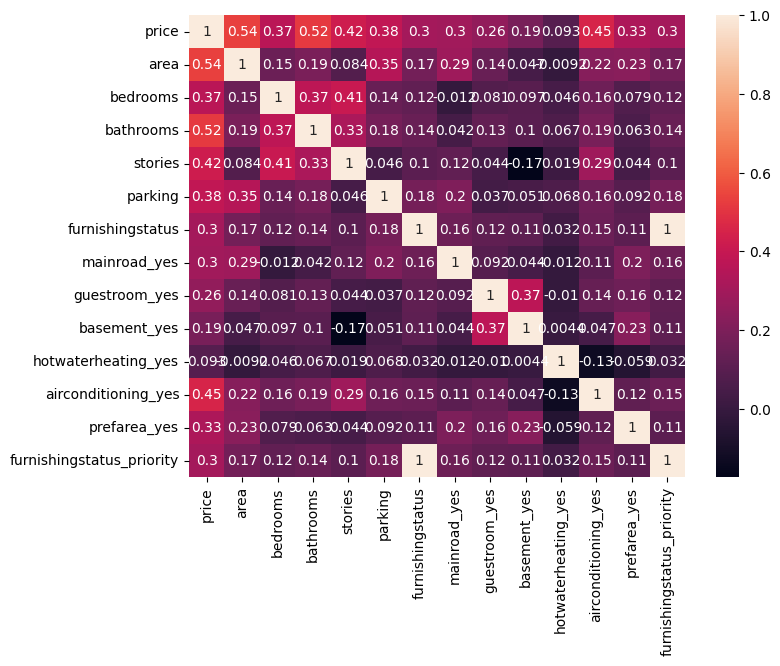

In [47]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),annot=True)

<Axes: >

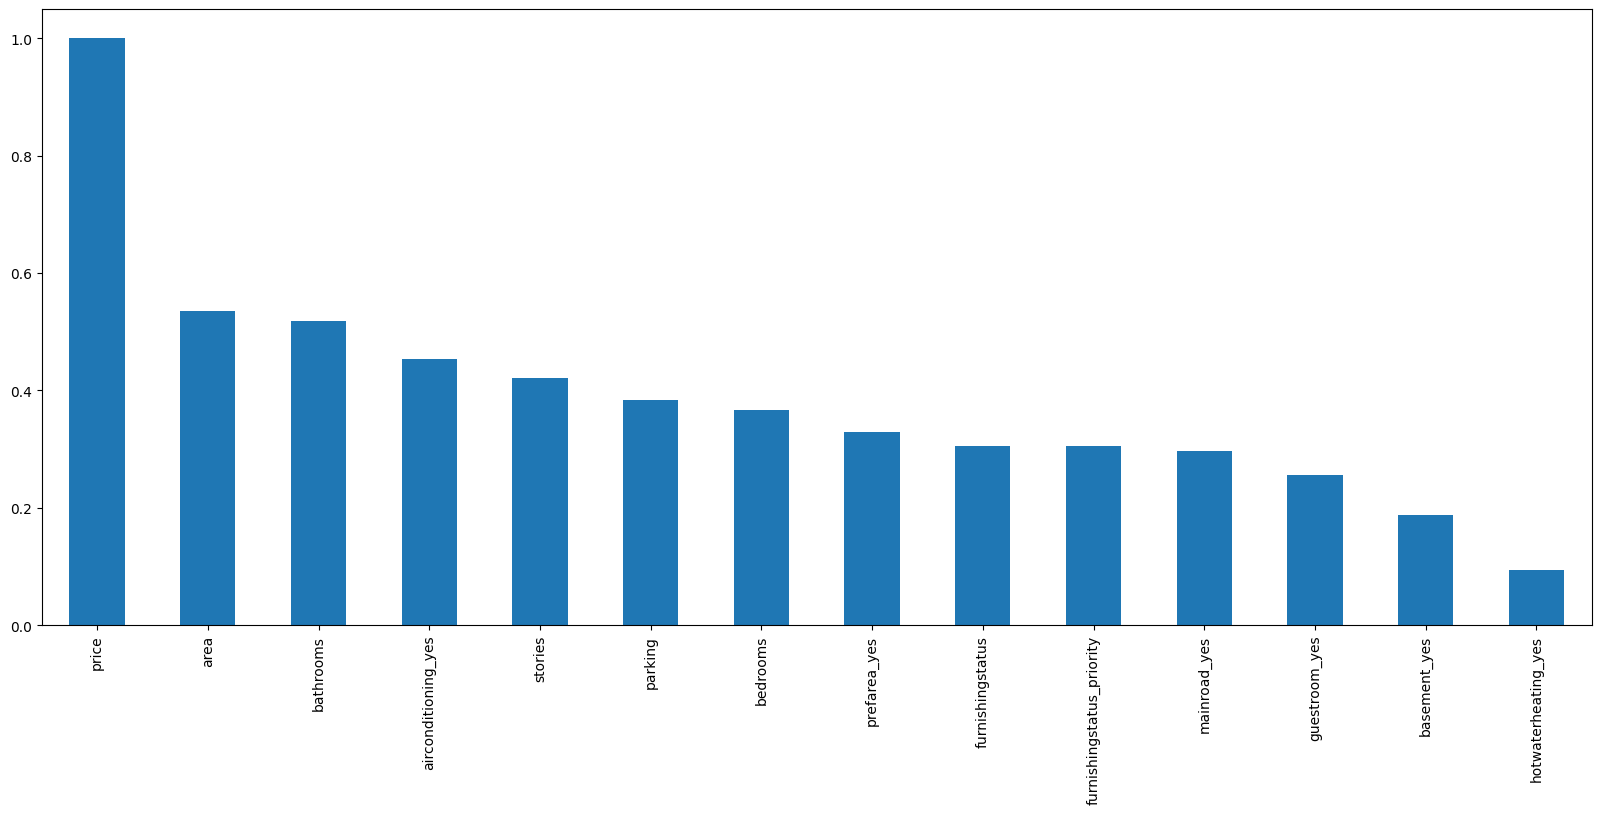

In [48]:
plt.figure(figsize=(20,8))
df.corr()['price'].sort_values(ascending=False).plot(kind='bar')

In [49]:
## Numerical data

<Axes: xlabel='area', ylabel='Count'>

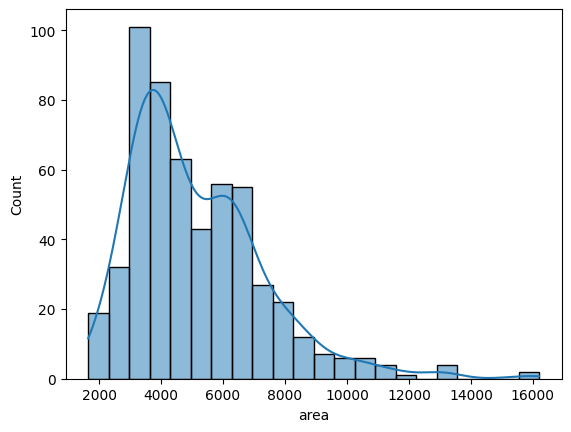

In [50]:
sns.histplot(data = df,x = 'area',kde = True)

In [51]:
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler()
new_df = pd.DataFrame(df,columns=['area'])
normalized_df = scalar.fit_transform(new_df)
print(normalized_df)

[[0.39656357]
 [0.5024055 ]
 [0.57113402]
 [0.40206186]
 [0.39656357]
 [0.40206186]
 [0.47628866]
 [1.        ]
 [0.44329897]
 [0.28178694]
 [0.79381443]
 [0.29896907]
 [0.33676976]
 [0.12714777]
 [0.42268041]
 [0.29896907]
 [0.34020619]
 [0.47079038]
 [0.20274914]
 [0.32783505]
 [0.18350515]
 [0.37835052]
 [0.43986254]
 [0.2       ]
 [0.49140893]
 [0.33608247]
 [0.29896907]
 [0.49656357]
 [0.43298969]
 [0.26460481]
 [0.40034364]
 [0.36769759]
 [0.22199313]
 [0.29621993]
 [0.35670103]
 [0.36769759]
 [0.40082474]
 [0.50515464]
 [0.29896907]
 [0.29896907]
 [0.33676976]
 [0.32371134]
 [0.33195876]
 [0.29896907]
 [0.29896907]
 [0.29896907]
 [0.29896907]
 [0.34020619]
 [0.18213058]
 [0.39793814]
 [0.39793814]
 [0.32130584]
 [0.29896907]
 [0.24054983]
 [0.29896907]
 [0.29896907]
 [0.67285223]
 [0.50515464]
 [0.41443299]
 [0.29896907]
 [0.29896907]
 [0.49690722]
 [0.31546392]
 [0.32371134]
 [0.65463918]
 [0.49690722]
 [0.79381443]
 [0.41580756]
 [0.29896907]
 [0.71752577]
 [0.16151203]
 [0.29

In [52]:
df['normalized_area'] = normalized_df
df.head(5)

,price,area,bedrooms,bathrooms,stories,parking,furnishingstatus,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_priority,normalized_area
0,13300000,7420,4,2,3,2,3,1,0,0,0,1,1,3,0.396564
1,12250000,8960,4,4,4,3,3,1,0,0,0,1,0,3,0.502405
2,12250000,9960,3,2,2,2,2,1,0,1,0,0,1,2,0.571134
3,12215000,7500,4,2,2,3,3,1,0,1,0,1,1,3,0.402062
4,11410000,7420,4,1,2,2,3,1,1,1,0,1,0,3,0.396564
